In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# pip install tensowflow_datasets untuk remote datasets

In [36]:
(train, val, test), info = tfds.load('fashion_mnist', split=['train[:80%]', 'train[80%:]', 'test'],
                                    as_supervised=True, with_info=True)

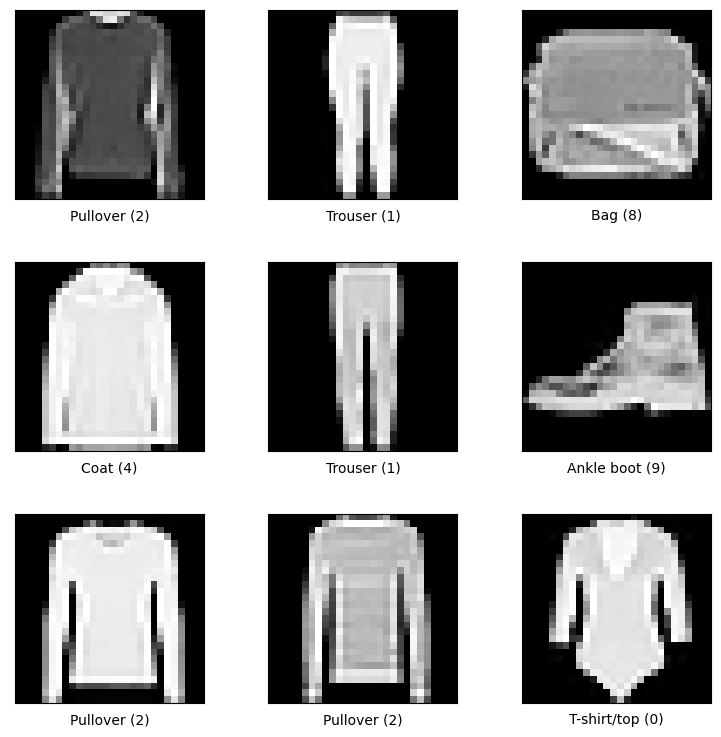

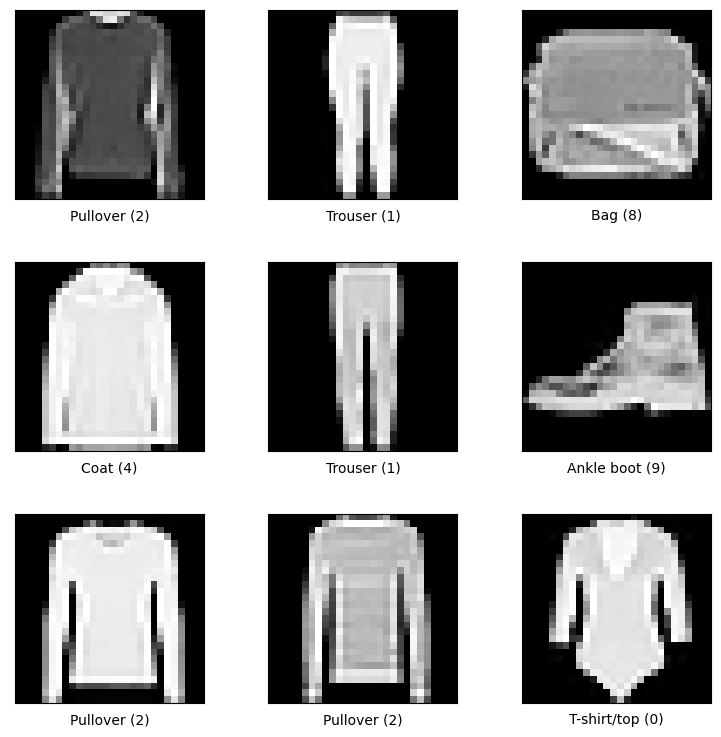

In [37]:
tfds.show_examples(train, info)

In [38]:
def normalize_img(image, label):
    # cast = merubah nilai variabel menjadi float
    return tf.cast(image, tf.float32)/255, label
# map = normalisasi konversi menjadi sesuatu
train = train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
train = train.cache()
train = train.batch(128)
train = train.prefetch(tf.data.AUTOTUNE)

val = val.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
val = val.cache()
val = val.batch(128)
val = val.prefetch(tf.data.AUTOTUNE)

test = test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test = test.cache()
test = test.batch(128)
test = test.prefetch(tf.data.AUTOTUNE)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                346176    
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
________________________________________________

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
hasil = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
375/375 [==============================] - 14s 38ms/step - loss: 0.5160 - accuracy: 0.8184 - val_loss: 0.3499 - val_accuracy: 0.8758
Epoch 2/10
375/375 [==============================] - 14s 36ms/step - loss: 0.3339 - accuracy: 0.8814 - val_loss: 0.3012 - val_accuracy: 0.8895
Epoch 3/10
375/375 [==============================] - 13s 35ms/step - loss: 0.2885 - accuracy: 0.8973 - val_loss: 0.2756 - val_accuracy: 0.8990
Epoch 4/10
375/375 [==============================] - 13s 36ms/step - loss: 0.2603 - accuracy: 0.9071 - val_loss: 0.2602 - val_accuracy: 0.9057
Epoch 5/10
375/375 [==============================] - 14s 37ms/step - loss: 0.2386 - accuracy: 0.9147 - val_loss: 0.2509 - val_accuracy: 0.9098
Epoch 6/10
375/375 [==============================] - 13s 36ms/step - loss: 0.2207 - accuracy: 0.9211 - val_loss: 0.2454 - val_accuracy: 0.9115
Epoch 7/10
375/375 [==============================] - 14s 37ms/step - loss: 0.2050 - accuracy: 0.9267 - val_loss: 0.2433 - val_accuracy:

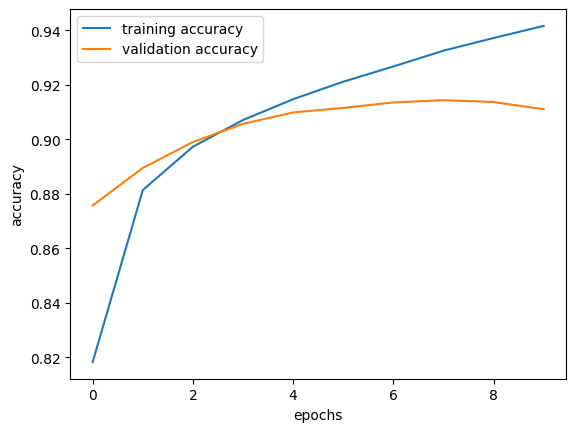

In [43]:
plt.plot(hasil.history['accuracy'])
plt.plot(hasil.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

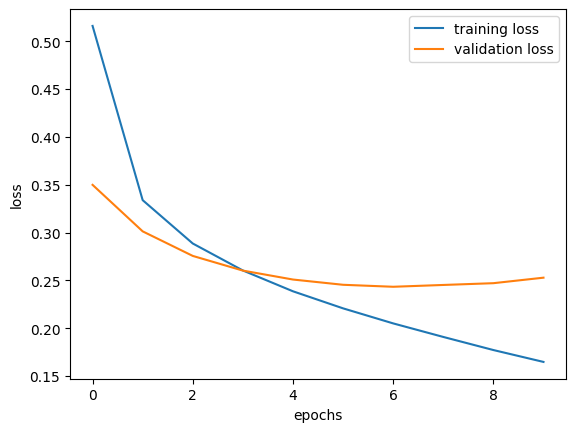

In [45]:
plt.plot(hasil.history['loss'])
plt.plot(hasil.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'])
plt.show()